# Примеры к лекции 1

## Вычисление асимптотических разложений с использованием SymPy

In [1]:
import sympy as sym
from sympy import Symbol, exp, series, limit, Rational, init_printing
init_printing()

### *Задача 1.* Найти первые $N$ членов разложения функции $f=\dfrac1{1-\mathrm e^\varepsilon}$

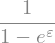

In [2]:
eps=Symbol('varepsilon',real=True)
f=1/(1-exp(eps))
f

Вычисляем предел при $\varepsilon\to0$

In [3]:
limit(f,eps,0,'+')

Выскажем предположение, что начальный член асимптотики есть $1/\varepsilon$, а другие калибровочные функции суть целые степени $\varepsilon$. 

In [8]:
# Проверяем предположение о начальном члене асимптотики
limit(f/(1/eps),eps,0,'+')

Поскольку предел конечен, то теперь построим список калибровочных функций

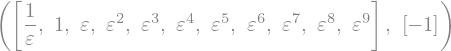

In [5]:
Nexpand=11 # Порядок разложения
cflst=[eps**i for i in range(-1,Nexpand-1)] # Список калибровочных функций
a=[limit(f/cflst[0],eps,0,'+')]  # Первый член разложения
cflst,a

Каждый коеффициент разложения найдем по формуле $a_{k+1}=\lim\limits _{\varepsilon \rightarrow \varepsilon_{0}} \dfrac{f-a_{k} \varphi_{k}}{\varphi_{k+1}}$, $a_0=0$.

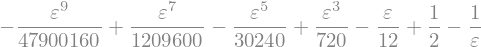

In [6]:
for i in range(1,Nexpand):
    psum=sum([a[j]*cflst[j] for j in range(i)])
    a.append(limit((f-psum)/cflst[i],eps,0,'+'))

f_expand = sum([a[j]*cflst[j] for j in range(Nexpand)])
f_expand

Выполним проверку с помощью функции series. Метод remove0() нужен для того, чтобы убрать в разложении символ порядка.

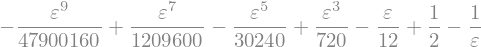

In [7]:
series(f,eps,0,Nexpand,'+').removeO()

### *Задача 2.* 
Найти первые члены разложения всех корней уравнения $x^2+2\varepsilon x-1=0$. 

Сравнить с точным решением.

In [8]:
from sympy import symbols, Function, diff, collect, solve
Nexpand=9
x=symbols(f'x0:{Nexpand+2}')#это список индексированных переменных
X=Symbol('X')
eq2=X**2+2*eps*X-1 # Исходное уравнение
eq2

Будем искать разложение корня в виде ряда по $\varepsilon$

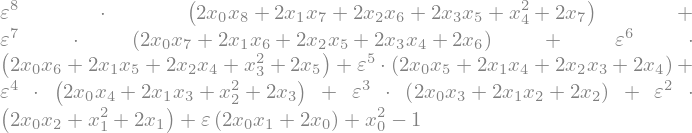

In [9]:
Subsseries=sum(x[i]*eps**i for i in range(Nexpand))
# Подстановка ряда в уравнение и группировка по epsilon
Res=series(collect(eq2.subs(X,Subsseries).expand(),eps),eps,0,Nexpand).removeO() 
Res

In [10]:
# Находим корни невозмущённого уравнения
roots0=solve(Res.coeff(eps,0),dict=True)
roots0

{x0: -1, x1: -1, x2: -1/2, x3: 0, x4: 1/8, x5: 0, x6: -1/16, x7: 0, x8: 5/128}


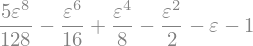

In [11]:
# Находим коэффициенты разложения первого корня
root1a=roots0[0]
Sys1=[Res.coeff(eps,i).subs(root1a) for i in range(Nexpand)]
root1a.update(solve(Sys1)[0])
#Sol1=dict(root1,**)
print(root1a)
Subsseries.subs(root1a)

{x0: 1, x1: -1, x2: 1/2, x3: 0, x4: -1/8, x5: 0, x6: 1/16, x7: 0, x8: -5/128}


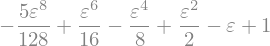

In [12]:
# Находим коэффициенты разложения второго корня
root2a=roots0[1]
Sys2=[Res.coeff(eps,i).subs(root2a) for i in range(Nexpand)]
root2a.update(solve(Sys2)[0])
#Sol1=dict(root1,**)
print(root2a)
Subsseries.subs(root2a)

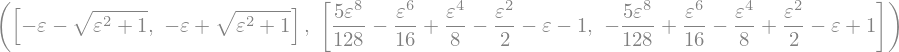

In [13]:
# Разложение точного решения
Sol=solve(eq2,X)
Solseries=[series(sol,eps,0,Nexpand).removeO() for sol in Sol]
Sol,Solseries

### *Задача 3.* Найти первые члены разложения  корней уравнения $\varepsilon^2x^3-x+1=0$ при $\varepsilon\ll1$.

In [14]:
Nexpand=9
eq3=eps**2*X**3-X+1 # Исходное уравнение
eq3

In [15]:
from PG.pglib import *

In [16]:
S,C = SCH(eq3,[eps,X])
#print(S)
normlst = Normlst(C)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([ 3, -2], dtype=int32)),
 (1, array([-1,  0], dtype=int32)),
 (2, array([-1,  1], dtype=int32))]

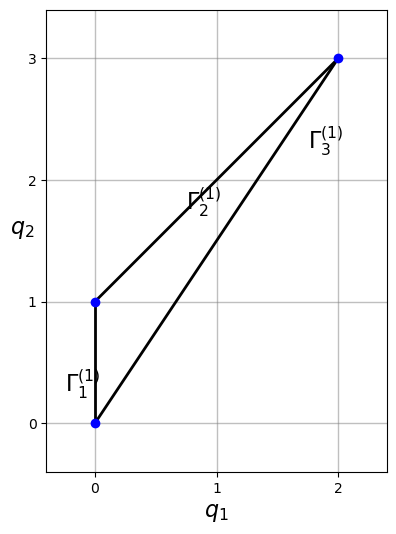

In [17]:
ax1 = NPimage(C,S)
AddEdgeLabel(ax1,S,C,normlst,1,r'$\Gamma_1^{(1)}$')
AddEdgeLabel(ax1,S,C,normlst,2,r'$\Gamma_2^{(1)}$')
AddEdgeLabel(ax1,S,C,normlst,0,r'$\Gamma_3^{(1)}$')
#plt.savefig("fig1.pdf",dpi=300,bbox_inches='tight')
plt.show()

Если построить многоугольник Ньютона, то у него есть два ребра с отрицательной первой координатой

In [18]:
GetTrunc(eq3,C,1,[eps,X]).factor(),GetTrunc(eq3,C,2,[eps,X]).factor()

Первому ребру соответствует многочлен $X-1$, тогда начальное приближение корня есть $X_0=1$.

Второму ребру соответствует многочлен $\varepsilon^2 X^3-X$, тогда начальное приближение корня есть $X_0=\pm\dfrac1{\varepsilon}$.

Итого имеем 3 корня.

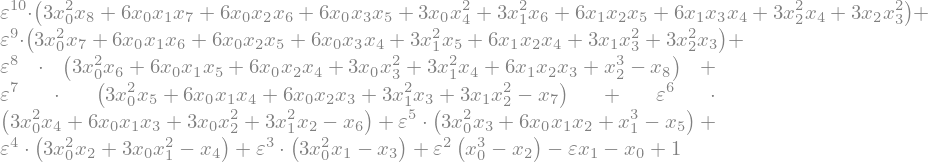

In [19]:
x=symbols(f'x0:{Nexpand+2}')#Function('x')(eps)
Subsseries1=sum(x[i]*eps**(i) for i in range(Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res1=series(collect(eq3.subs(X,Subsseries1).expand(),eps),eps,0,Nexpand+2).removeO() 
Res1

In [20]:
# Находим коэффициенты разложения первого корня
root1={x[0]:solve(GetTrunc(eq3,C,1,[eps,X]))[0]} 
Sys1=[Res1.coeff(eps,i).subs(root1) for i in range(Nexpand)]
#solve(Sys1)
root1.update(solve(Sys1)[0])
print(root1)
Subsseries1.subs(root1)

{x0: 1, x1: 0, x2: 1, x3: 0, x4: 3, x5: 0, x6: 12, x7: 0, x8: 55}


In [21]:
# Находим второй и третий корни разложения
roots23 = solve(GetTrunc(eq3,C,2,[eps,X]),X)

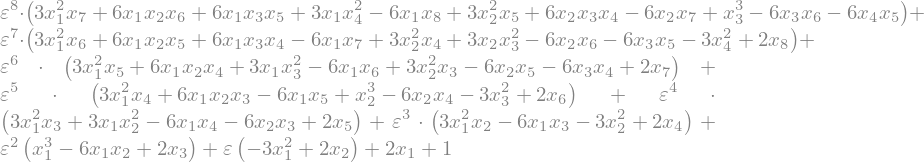

In [22]:
# Находим второй корень начиная от 1/epsilon
Subsseries2=roots23[1]+sum(x[i]*eps**(i-1) for i in range(1,Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res2=series(collect(eq3.subs(X,Subsseries2).expand(),eps),eps,0,Nexpand).removeO() 
Res2

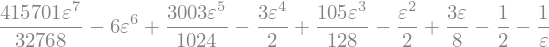

In [23]:
# Находим коэффициенты разложения второго корня
root2=dict() 
Sys2=[Res2.coeff(eps,i) for i in range(Nexpand-1)]
root2.update(solve(Sys2)[0])
#Sol1=dict(root1,**)
#print(root1)
Subsseries2.subs(root2)

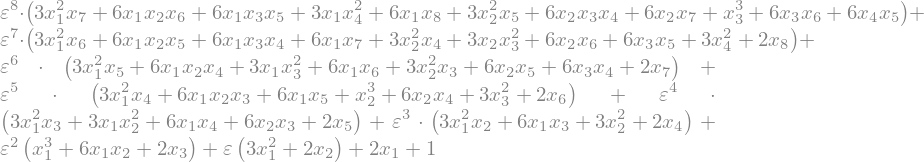

In [24]:
# Находим третий корень начиная от -1/epsilon
Subsseries3=roots23[2]+sum(x[i]*eps**(i-1) for i in range(1,Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res3=series(collect(eq3.subs(X,Subsseries3).expand(),eps),eps,0,Nexpand).removeO() 
Res3

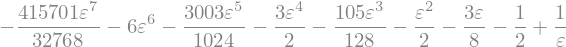

In [25]:
# Находим коэффициенты разложения третьего корня
root3=dict() 
Sys3=[Res3.coeff(eps,i) for i in range(Nexpand-1)]
root3.update(solve(Sys3)[0])
#Sol1=dict(root1,**)
#print(root1)
Subsseries3.subs(root3)

# Вычисление разложения с помощью неявного дифференцирования

Покажем, как найти разложение решения с помощью неявного дифференцирования $x$ по $\varepsilon$ с помощью уравнения $f(x,\varepsilon)=0$.

Поскольку хотим получить $x$ как ряд по $\varepsilon$, то вычислим производные неявной функции и подставим в ряд значение начального корня

In [26]:
# Using implicit differentiation
from sympy import idiff, factorial
eq2

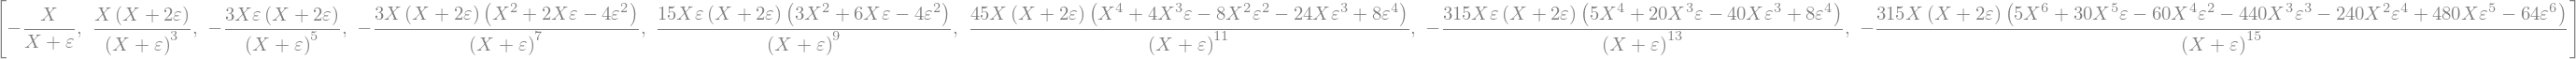

In [27]:
# Вычисляем производные 
DXlst=[idiff(eq2,X,eps,n).factor() for n in range(1,Nexpand)]
DXlst

In [28]:
Subs1 = {eps:0,X:root1a[x[0]]}
Subs2 = {eps:0,X:root2a[x[0]]}
Subs1,Subs2

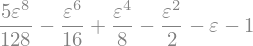

In [29]:
# Подставим первый корень
eq2_exp1 = sum([Subs1[X]]+[t.subs(Subs1)*eps**i/factorial(i) for i,t in enumerate(DXlst,1)])
eq2_exp1

In [ ]:
# Подставим второй корень
eq2_exp2 = sum([Subs2[X]]+[t.subs(Subs2)*eps**i/factorial(i) for i,t in enumerate(DXlst,1)])
eq2_exp2

In [32]:
eq3

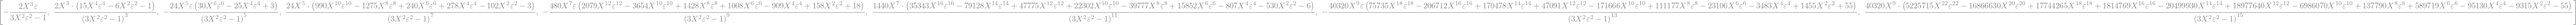

In [33]:
DX2lst=[idiff(eq3,X,eps,n).factor() for n in range(1,Nexpand)]
DX2lst

In [35]:
Subs_eq3r1={eps:0,X:root1[x[0]]}
Subs_eq3r1

In [36]:
sum([Subs_eq3r1[X]]+[(t.subs(Subs_eq3r1)*eps**i/factorial(i)).simplify() for i,t in enumerate(DX2lst,1)])

In [49]:
Y= Symbol("Y",real=True)
eq3aY = eq3.subs(X,roots23[1]+Y).expand()
eq3aY

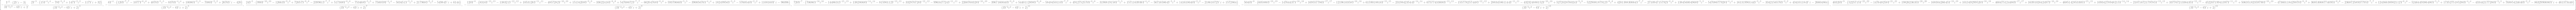

In [50]:
DX3alst=[idiff(eq3aY,Y,eps,n).factor() for n in range(1,Nexpand)]
DX3alst

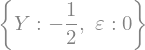

In [51]:
Subs_eq3r2={eps:0,Y:Rational(-1,2)}
Subs_eq3r2

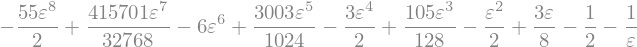

In [52]:
sum([roots23[1],Subs_eq3r2[Y]]+[t.subs(Subs_eq3r2)*eps**i/factorial(i).simplify() for i,t in enumerate(DX3alst,1)])

In [53]:
eq3bY = eq3.subs(X,roots23[2]+Y).expand()
eq3bY

In [54]:
DX3blst=[idiff(eq3bY,Y,eps,n).factor() for n in range(1,Nexpand)]
#DX3alst

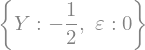

In [55]:
Subs_eq3r3={eps:0,Y:Rational(-1,2)}
Subs_eq3r3

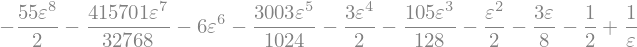

In [56]:
sum([roots23[2],Subs_eq3r2[Y]]+[t.subs(Subs_eq3r2)*eps**i/factorial(i).simplify() for i,t in enumerate(DX3blst,1)])